# Import Libraries

In [38]:
# Import pygmt for creating maps and processing geospatial data, leveraging the Generic Mapping Tools (GMT).
import pygmt

# Import numpy as np for numerical operations on arrays and matrices, widely used for scientific computing.
import numpy as np

# Import pandas as pd for data manipulation and analysis, particularly useful for handling structured data.
import pandas as pd

# Import pyplot from matplotlib as plt for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# Import seaborn as sns for statistical data visualization, built on top of matplotlib and closely integrated with pandas data structures.
import seaborn as sns

# From the scipy library, import stats module for a large number of probability distributions and statistical functions.
from scipy import stats

# From statsmodels' tsa.stattools, import adfuller and kpss for statistical tests that can be used to check the stationarity of a time series.
# adfuller: Augmented Dickey-Fuller unit root test.
# kpss: Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.
from statsmodels.tsa.stattools import adfuller, kpss

# From statsmodels' graphics.tsaplots, import plot_acf and plot_pacf for plotting the autocorrelation and partial autocorrelation functions,
# useful in the analysis of time series data.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import EVA (Extreme Value Analysis), get_extremes, and get_return_periods from pyextremes for analyzing and modeling extreme values in data.
from pyextremes import EVA, get_extremes, get_return_periods

# Import TabularDataset and TabularPredictor from autogluon.tabular for automated machine learning on tabular data.
# TabularDataset: For loading and pre-processing structured data.
# TabularPredictor: For training machine learning models and making predictions.
from autogluon.tabular import TabularDataset, TabularPredictor

# Set the plotting style to 'bmh' (Bayesian Methods for Hackers:  Davidson-Pilon(2015)) using matplotlib. This style is suited for visualizations within
# Bayesian frameworks but is widely applicable for its clean and readable presentation.
plt.style.use("bmh")

In [39]:
# SHUT UP!!!
import shutup; shutup.please()

# Introduction

Balikpapan Bay, situated in East Borneo between Nusantara City and Balikpapan City-Penajam Paseur Utara Regency, stretches over a north-south axis for about 35 km. Its width varies from 1 – 8 km. This semi-enclosed bay is fed by fresh water from Sepaku, Semoi, Wain, and Riko Rivers, while saline water enters from the Makassar Strait [Anwar et al., 2023](http://www.bioflux.com.ro/docs/2023.2349-2368.pdf). See two figures below for a visual representation.

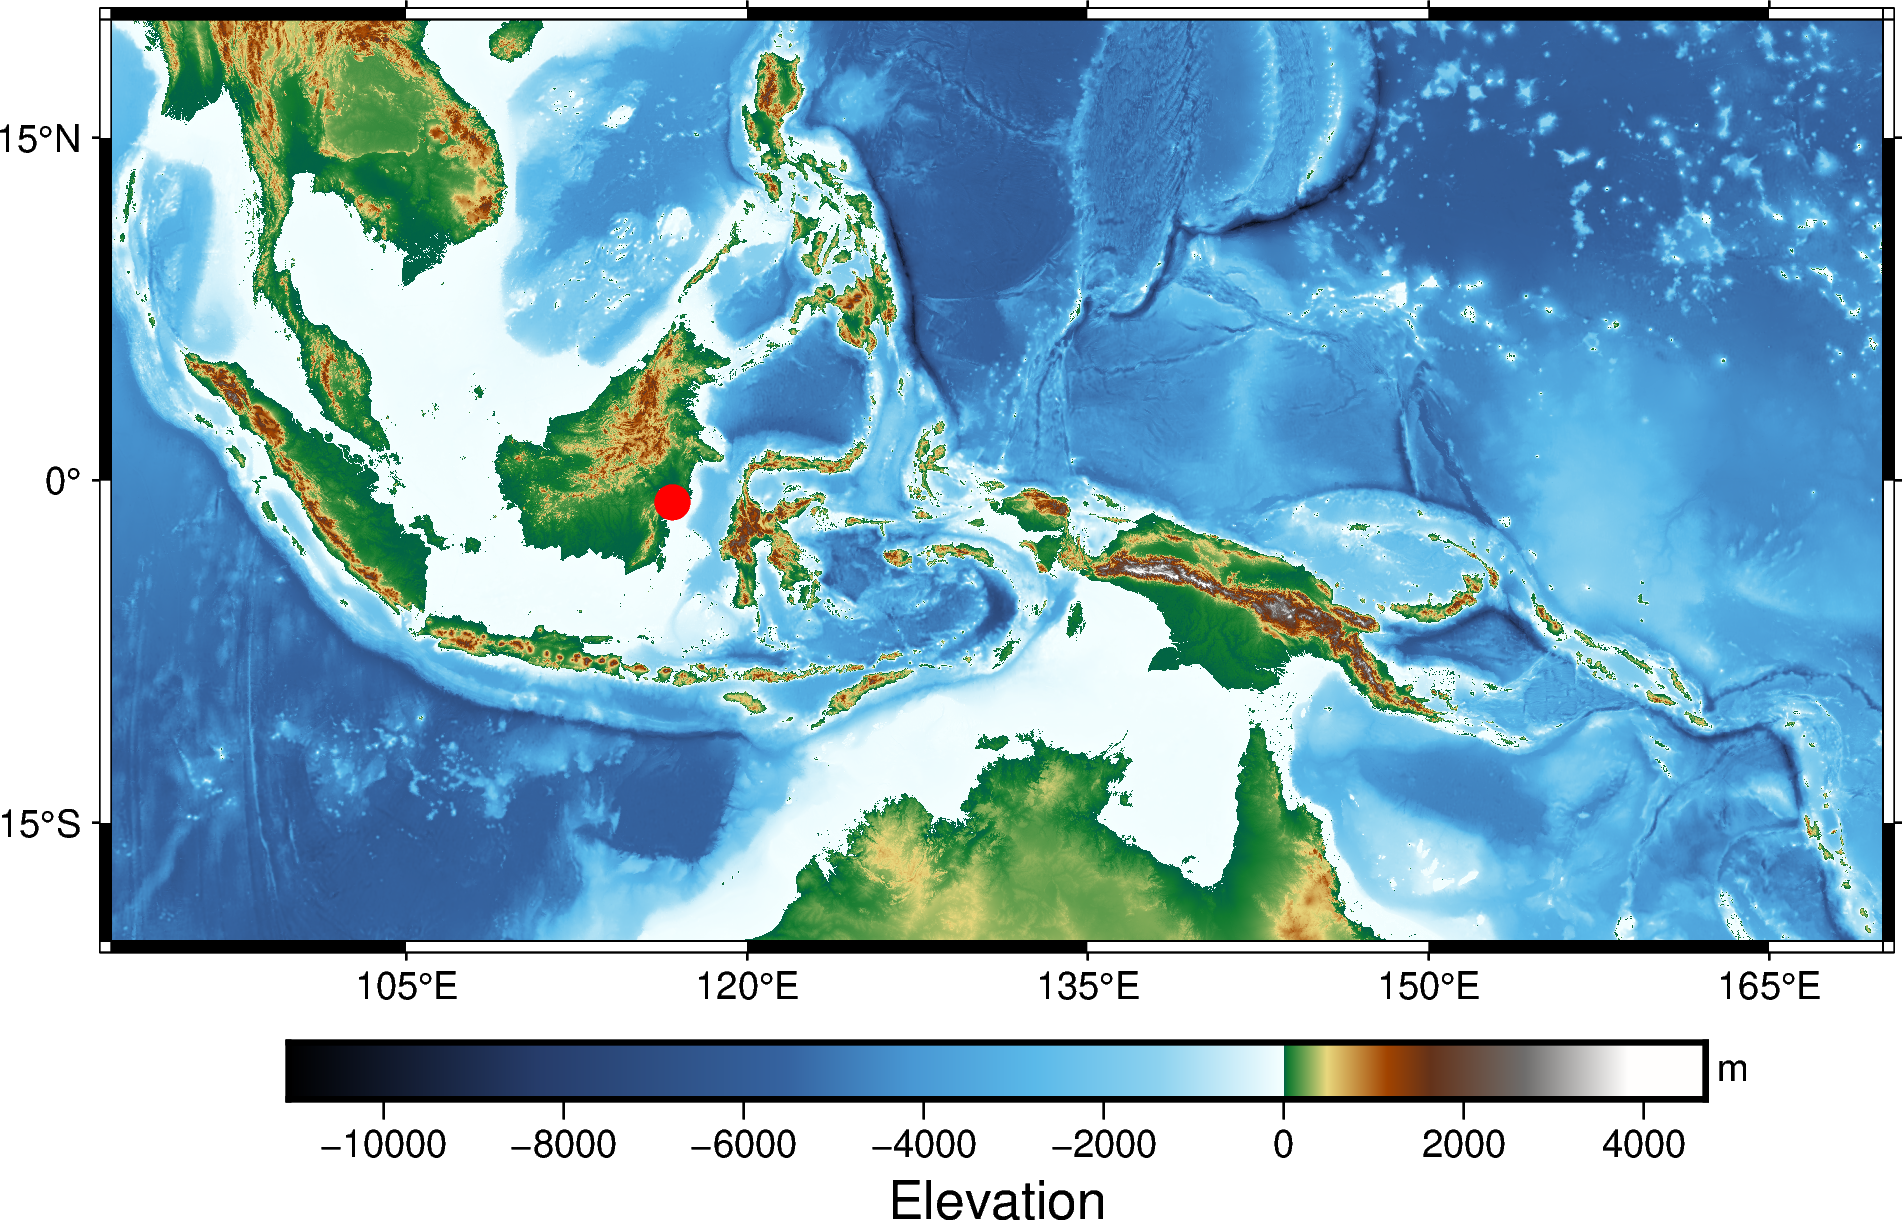

In [40]:
class SRTMMapPlotter:
    """
    A class to encapsulate the process of loading, plotting, and saving SRTM15+ Earth relief data using PyGMT.

    Attributes:
        region (list): The geographical region to plot specified as [west, east, south, north].
        resolution (str): The resolution of the Earth relief data. Default is "15s".
        grid (xarray.DataArray): The loaded Earth relief data for the specified region.
        figure (pygmt.Figure): The PyGMT figure object for plotting.

    Methods:
        load_data(): Loads the Earth relief data based on the specified region and resolution.
        plot_map(): Plots the Earth relief data as a map.
        plot_marker(x, y, style, fill): Marks a specific point on the map.
        add_colorbar(frame): Adds a colorbar to the map.
        show(): Displays the figure in an interactive window.
        save(filename, dpi): Saves the figure to a file with the specified resolution.
    """
    def __init__(self, region, resolution="15s"):
        """
        Initializes the SRTMMapPlotter object with a specified region and resolution.

        Parameters:
            region (list): The geographical region to plot specified as [west, east, south, north].
            resolution (str): The resolution of the Earth relief data. Default is "15s".
        """
        self.region = region
        self.resolution = resolution
        self.grid = self.load_data()
        self.figure = pygmt.Figure()

    def load_data(self):
        """
        Loads the Earth relief data for the specified region and resolution.

        Returns:
            xarray.DataArray: The loaded Earth relief data.
        """
        return pygmt.datasets.load_earth_relief(resolution=self.resolution, region=self.region)

    def plot_map(self):
        """
        Plots the Earth relief data as a map using the loaded grid data.
        """
        self.figure.grdimage(grid=self.grid, projection="M15c", frame="a", cmap="geo")

    def plot_marker(self, x, y, style="c0.3c", fill="red"):
        """
        Marks a specific point on the map with a marker.

        Parameters:
            x (float): The longitude of the point to mark.
            y (float): The latitude of the point to mark.
            style (str): The style of the marker. Default is "c0.3c".
            fill (str): The fill color of the marker. Default is "red".
        """
        self.figure.plot(x=x, y=y, style=style, fill=fill)

    def add_colorbar(self, frame=["a2000", "x+lElevation", "y+lm"]):
        """
        Adds a colorbar to the map to indicate elevation values.

        Parameters:
            frame (list): Customization options for the colorbar. Default shows elevation in meters.
        """
        self.figure.colorbar(frame=frame)

    def show(self):
        """
        Displays the figure in an interactive window.
        """
        self.figure.show()

    def save(self, filename="../figs/fig1.png", dpi=400):
        """
        Saves the figure to a file with the specified resolution.

        Parameters:
            filename (str): The path and name of the file to save the figure.
            dpi (int): The resolution in dots per inch (DPI) for the saved figure. Default is 400.
        """
        self.figure.savefig(filename, dpi=dpi)

# IMC map
if __name__ == "__main__":
    # Initialize the plotter with a specific geographical region
    plotter = SRTMMapPlotter(region=[92, 170, -20, 20])
    # Plot the Earth relief map
    plotter.plot_map()
    # Add a marker to the map
    plotter.plot_marker(x=116.708611, y=-0.973056)
    # Add a colorbar to the map
    plotter.add_colorbar()
    # Display the map
    plotter.show()
    # Save the map to a file
    plotter.save()

Local bathymetry from [Putri et al. (2021)](https://doi.org/10.13170/depik.10.2.19259):

![Balikpapan Bay](../figs/balikpapan.png "my title")

Why so important?

- The Indonesian government intends to relocate its capital from Jakarta to Nusantara, at an estimated cost of $32 billion [(Normile, 2020)](https://www.science.org/content/article/indonesia-s-utopian-new-capital-may-not-be-green-it-looks).

- 

# Exploratory Data Analysis

Data:

-  

## Read Data

In [6]:
df = pd.read_csv("../data/all_data.csv", index_col="Date",
                parse_dates=True)

In [7]:
print(df.head())

            Chlorophyll_a   Nitrate  Phosphate  Silicate  Dissolved_Oxygen  \
Date                                                                         
2019-01-01           1.39  0.388450   0.001513  9.791618        201.420494   
2019-01-02           1.90  0.235056   0.001080  8.510964        201.230118   
2019-01-03           1.89  0.188044   0.001179  8.200518        201.149078   
2019-01-04           1.68  0.155607   0.001050  8.054524        201.072983   
2019-01-05           1.39  0.154504   0.001147  8.111265        201.004051   

            Total_River_Discharge  Rainfall  Temperature   Salinity  \
Date                                                                  
2019-01-01              92.373733       0.0    31.243146  33.284887   
2019-01-02             151.474331      12.8    30.575972  32.932942   
2019-01-03             167.575625       1.5    29.944068  32.838706   
2019-01-04             141.435395      54.0    29.590075  32.599721   
2019-01-05             115.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2019-01-01 to 2021-12-31
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Chlorophyll_a          1096 non-null   float64
 1   Nitrate                1096 non-null   float64
 2   Phosphate              1096 non-null   float64
 3   Silicate               1096 non-null   float64
 4   Dissolved_Oxygen       1096 non-null   float64
 5   Total_River_Discharge  1096 non-null   float64
 6   Rainfall               1096 non-null   float64
 7   Temperature            1096 non-null   float64
 8   Salinity               1096 non-null   float64
 9   Solar_Radiation        1096 non-null   float64
dtypes: float64(10)
memory usage: 94.2 KB
None


In [9]:
print(df.describe())

       Chlorophyll_a      Nitrate    Phosphate     Silicate  Dissolved_Oxygen  \
count    1096.000000  1096.000000  1096.000000  1096.000000       1096.000000   
mean        1.756898     0.507450     0.020163    12.016882        204.868132   
std         1.099418     0.737098     0.022469     8.835000          6.014129   
min         0.350000     0.007469     0.000189     3.495606        195.911545   
25%         1.000000     0.026940     0.003154     5.038887        201.106545   
50%         1.510000     0.137631     0.008718     8.452248        202.189230   
75%         2.180000     0.700852     0.039026    16.152503        207.026505   
max        11.270000     3.348402     0.081026    40.316134        229.375118   

       Total_River_Discharge     Rainfall  Temperature     Salinity  \
count            1096.000000  1096.000000  1096.000000  1096.000000   
mean              214.299935     8.576825    29.224334    29.704912   
std               130.865359    18.006769     0.407383   

## Annual Cycle

In [10]:
class SeasonalPlotter:
    """
    A utility class for plotting seasonal trends in a pandas DataFrame. 
    This class is designed to help visualize monthly trends in data over time.
    """

    def __init__(self, dataframe):
        """
        Initializes the SeasonalPlotter with a pandas DataFrame.

        Parameters:
        - dataframe: pandas DataFrame containing the data to be analyzed and plotted.
        """
        try:
            self.dataframe = dataframe
            dataframe.head()  # Try accessing the DataFrame to ensure it's valid.
        except Exception as e:
            print(f"Initialization failed: {e}")
            raise ValueError("Invalid DataFrame provided.") from e

    def plot_seasonal_monthly(self, column_name, title, x_label, y_label, color, save_path=None, dpi=300):
        """
        Plots the monthly seasonal trend of a specified column from the DataFrame.

        Parameters:
        - column_name: The name of the column to analyze and plot.
        - title: The title of the plot.
        - x_label: Label for the x-axis.
        - y_label: Label for the y-axis.
        - color: Color of the bars in the barplot.
        - save_path (optional): The file path to save the plot image. If None, the plot is not saved.
        - dpi (optional): The resolution of the saved plot image. Defaults to 300 DPI.
        
        This method prints out the month with the minimum and maximum average values of the specified column 
        and generates a bar plot showing the average value of the specified column for each month to identify seasonal trends.
        """
        try:
            # Ensure the column exists
            if column_name not in self.dataframe.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")

            # Resample to monthly averages
            monthly_avg = self.dataframe[column_name].resample('M').mean()
            
            # Create a DataFrame for plotting, including a 'Month' column for the x-axis
            plot_data = pd.DataFrame({column_name: monthly_avg})
            plot_data['Month'] = plot_data.index.month  # Extract month for seasonal plotting
            
            # Group by month to calculate the average value for each month
            seasonal_trends = plot_data.groupby('Month')[column_name].mean()
            
            # Find and print the min and max monthly averages
            min_month = seasonal_trends.idxmin()
            max_month = seasonal_trends.idxmax()
            print(f"Month with minimum average value: {min_month} ({seasonal_trends.min():.2f})")
            print(f"Month with maximum average value: {max_month} ({seasonal_trends.max():.2f})")
            
            # Plotting
            plt.figure(figsize=(10, 6))
            sns.barplot(x=seasonal_trends.index, y=seasonal_trends, color=color)
            plt.title(title)
            plt.xlabel(x_label, fontsize=15)
            plt.ylabel(y_label, fontsize=15)
            plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            
            # Save the figure if a save path is provided
            if save_path:
                plt.savefig(save_path, dpi=dpi)
                print(f"Figure saved to {save_path} at {dpi} DPI.")
            
            plt.show()
        except Exception as e:
            print(f"Failed to plot seasonal monthly trends: {e}")

In [11]:
season_plot = SeasonalPlotter(df)

Month with minimum average value: 7 (1.34)
Month with maximum average value: 5 (2.11)
Figure saved to ../figs/fig2b.png at 400 DPI.


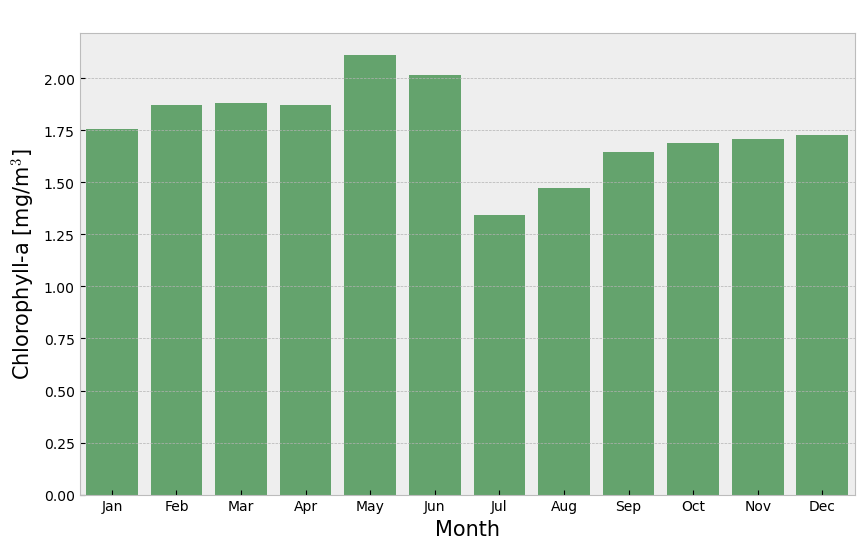

In [12]:
season_plot.plot_seasonal_monthly(
    column_name='Chlorophyll_a', 
    title=' ', 
    x_label='Month', 
    y_label='Chlorophyll-a [mg/m$^3$]',
    color='#5aad65',
    save_path='../figs/fig2b.png',
    dpi=400
)

## Univariate Time-Series Analyses

In [13]:
chl = df["Chlorophyll_a"]

In [14]:
chl.head()

Date
2019-01-01    1.39
2019-01-02    1.90
2019-01-03    1.89
2019-01-04    1.68
2019-01-05    1.39
Name: Chlorophyll_a, dtype: float64

In [15]:
print(chl.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 1096 entries, 2019-01-01 to 2021-12-31
Series name: Chlorophyll_a
Non-Null Count  Dtype  
--------------  -----  
1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB
None


In [16]:
print(chl.describe())

count    1096.000000
mean        1.756898
std         1.099418
min         0.350000
25%         1.000000
50%         1.510000
75%         2.180000
max        11.270000
Name: Chlorophyll_a, dtype: float64


In [17]:
# HABs events
top_two = chl.nlargest(2)
print("The two maximum Chlorophyll_a values and their dates are:")
for date, value in top_two.items():
    print(f"{value} mg/m^3 on {date.date()}")

The two maximum Chlorophyll_a values and their dates are:
11.27 mg/m^3 on 2020-06-16
10.43 mg/m^3 on 2019-11-09


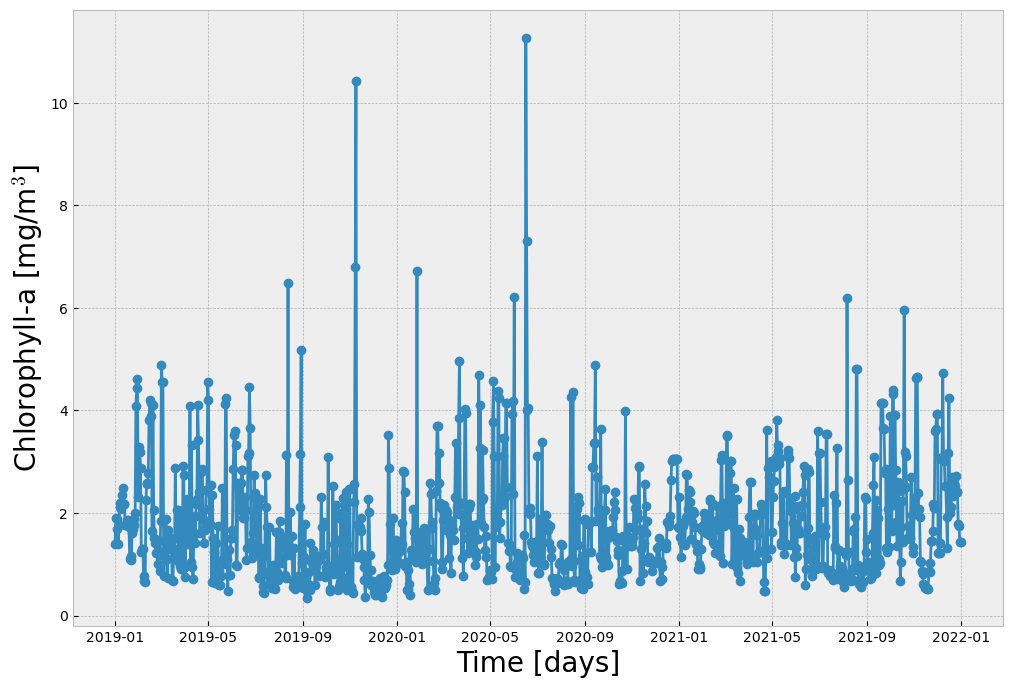

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(chl.index, chl.values, marker="o")  
ax.set_xlabel("Time [days]", fontsize=20)
ax.set_ylabel("Chlorophyll-a [mg/m$^3$]", fontsize=20)
plt.savefig('../figs/fig2a.png', dpi=400)
plt.show()

In [19]:
# HABs events
top_two = chl.nlargest(2)
print("The two maximum Chlorophyll_a concentrations:")
for date, value in top_two.items():
    print(f"{value} mg/m^3 on {date.date()}")

The two maximum Chlorophyll_a concentrations:
11.27 mg/m^3 on 2020-06-16
10.43 mg/m^3 on 2019-11-09


In [20]:
class TimeSeriesAnalysis:
    def __init__(self, series: pd.Series):
        """
        Initialize the TimeSeriesAnalysis with a Pandas Series.
        
        :param series: Pandas Series containing the time series data.
        """
        self.series = series

    def print_skewness_kurtosis(self) -> None:
        """
        Calculate and print skewness and kurtosis of the series.
        """
        try:
            skewness = stats.skew(self.series)
            kurtosis = stats.kurtosis(self.series)
            print(f"\nSkewness: {round(skewness, 3)}\nKurtosis: {round(kurtosis, 3)}")
            print("Interpretation: ", end="")
            print("The distribution is " + ("symmetric." if skewness == 0 else "skewed."))
            print("The distribution has " + ("less " if kurtosis < 0 else "excess ") + "kurtosis compared to a normal distribution.")
        except Exception as e:
            print(f"An error occurred while calculating skewness and kurtosis: {e}")
            
    def interpret_normality_tests(self) -> None:
        """
        Perform and interpret Shapiro-Wilk and D'Agostino's K^2 normality tests.
        """
        try:
            print("Normality Tests Interpretation:")
            shapiro_stat, shapiro_p = stats.shapiro(self.series)
            print(f"Shapiro-Wilk Test: Statistic={round(shapiro_stat, 3)}, p-value={round(shapiro_p, 3)}. " +
                  ("Data is not normally distributed." if shapiro_p < 0.05 else "Data follows a normal distribution."))
            
            dagostino_stat, dagostino_p = stats.normaltest(self.series)
            print(f"D’Agostino’s K^2 Test: Statistic={round(dagostino_stat, 3)}, p-value={round(dagostino_p, 3)}. " +
                  ("Data is not normally distributed." if dagostino_p < 0.05 else "Data follows a normal distribution."))
        except Exception as e:
            print(f"An error occurred during normality tests: {e}")

    def interpret_stationarity_tests(self) -> None:
        """
        Perform and interpret ADF and KPSS stationarity tests.
        """
        try:
            print("\nStationarity Tests Interpretation:")
            adf_result = adfuller(self.series, autolag='AIC')
            adf_stat, adf_p = adf_result[0], adf_result[1]
            print(f"ADF Test: Statistic={round(adf_stat, 3)}, p-value={round(adf_p, 3)}. " +
                  ("Series is stationary." if adf_p < 0.05 else "Series is not stationary."))
            
            kpss_result = kpss(self.series, regression='c')
            kpss_stat, kpss_p = kpss_result[0], kpss_result[1]
            print(f"KPSS Test: Statistic={round(kpss_stat, 3)}, p-value={round(kpss_p, 3)}. " +
                  ("Series is stationary." if kpss_p >= 0.05 else "Series is not stationary."))
        except Exception as e:
            print(f"An error occurred during stationarity tests: {e}")

    def plot_distribution_with_kde(self, filename: str = '../figs/fig2c.png') -> None:
        """
        Plot the distribution of the series with KDE and save to a file.
        Additionally, shows the plot.
        
        :param filename: Filename to save the plot.
        """
        try:
            fig, ax = plt.subplots(figsize=(12, 8))
            sns.histplot(self.series, kde=True, bins=15, ax=ax)
            ax.set_xlabel('Chlorophyll-a [mg/m$^3$]', fontsize=20)
            ax.set_ylabel('Probability Density', fontsize=20)
            plt.savefig(filename)
            plt.show()
            plt.close()
        except Exception as e:
            print(f"An error occurred while generating the KDE plot: {e}")

    def plot_acf_pacf(self, filename: str = '../figs/fig2d.png') -> None:
        """
        Plot ACF and PACF and save to a file. Additionally, shows the plot.
        
        :param filename: Filename to save the plot.
        """
        try:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
            plot_acf(self.series, ax=ax1)
            ax1.set_title("Autocorrelation Function", fontsize=30)
            plot_pacf(self.series, ax=ax2)
            ax2.set_title("Partial Autocorrelation Function", fontsize=30)
            plt.savefig(filename)
            plt.show()
            plt.close()
        except Exception as e:
            print(f"An error occurred while generating ACF and PACF plots: {e}")

In [21]:
analysis = TimeSeriesAnalysis(chl)

In [22]:
analysis.print_skewness_kurtosis()


Skewness: 2.212
Kurtosis: 10.16
Interpretation: The distribution is skewed.
The distribution has excess kurtosis compared to a normal distribution.


In [23]:
analysis.interpret_normality_tests()

Normality Tests Interpretation:
Shapiro-Wilk Test: Statistic=0.84, p-value=0.0. Data is not normally distributed.
D’Agostino’s K^2 Test: Statistic=574.189, p-value=0.0. Data is not normally distributed.


In [24]:
analysis.interpret_normality_tests()

Normality Tests Interpretation:
Shapiro-Wilk Test: Statistic=0.84, p-value=0.0. Data is not normally distributed.
D’Agostino’s K^2 Test: Statistic=574.189, p-value=0.0. Data is not normally distributed.


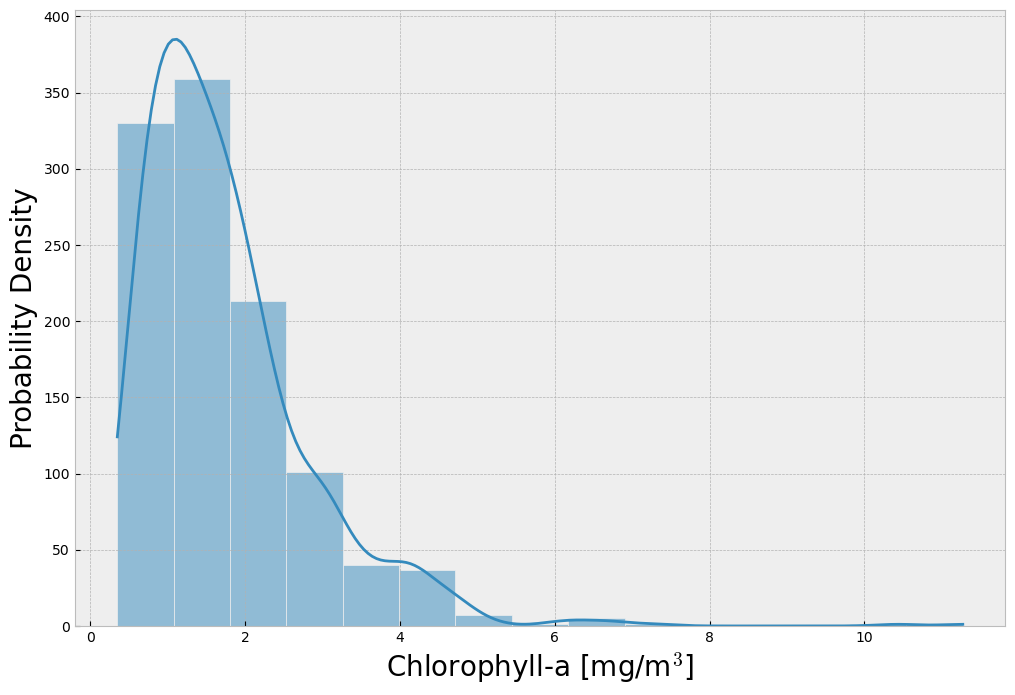

In [25]:
analysis.plot_distribution_with_kde()

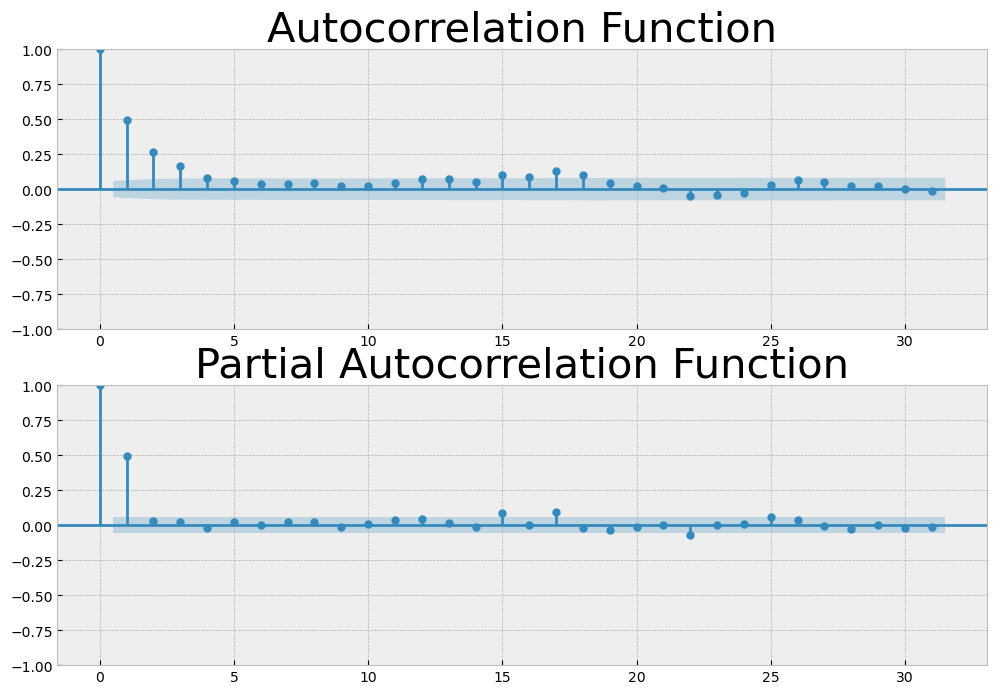

In [26]:
analysis.plot_acf_pacf()

# Extreme Value Analysis

In [27]:
class ExtChlorophyllModel:
    """
    A class to model and analyze extreme chlorophyll-a concentrations using Event Analysis.
$32 billion 
    Attributes:
        data (DataFrame): The dataset containing chlorophyll-a concentrations.
        model (EVA object): The extreme value analysis model object.
        summary_bm (DataFrame): Summary of block maxima and return periods.
        extremes (DataFrame): Identified extreme events.
        return_periods (DataFrame): Calculated return periods for extreme events.
    """

    def __init__(self, data):
        """
        Initializes the ExtChlorophyllModel with chlorophyll-a data.

        Parameters:
            data (DataFrame): The dataset containing chlorophyll-a concentrations.
        """
        self.data = data
        self.model = None
        self.summary_bm = None
        self.extremes = None
        self.return_periods = None

    def specify_model(self, block_size="14D"):
        """
        Specifies the extreme value analysis model with given parameters.

        Parameters:
            block_size (str): The size of the block for block maxima method. Defaults to "14D".
        """
        try:
            # Assuming EVA and get_extremes are defined elsewhere
            self.model = EVA(data=self.data)
            self.model.get_extremes(method="BM", extremes_type="high", block_size=block_size, errors="ignore")
        except Exception as e:
            print(f"Error specifying model: {e}")

    def fit_and_plot_model(self):
        """
        Fits the specified model using the Emcee sampler, prints the model summary,
        and plots the extremes and the Markov Chain Monte Carlo (MCMC) traces.
        """
        try:
            # Fit model
            self.model.fit_model(model='Emcee', n_walkers=500, n_samples=2500)
            print(self.model)
            
            # Plot Block Maxima
            fig, ax = self.model.plot_extremes(figsize=(12, 8))
            ax.set_xlabel('Time [days]', fontsize=20)
            ax.set_ylabel('Chlorophyll-a [mg/m$^3$]', fontsize=20)
            fig.tight_layout()
            plt.show()  # Display the figure
            fig.savefig('../figs/fig3a.png', dpi=400)  # Save the figure

            # Plot MCMC trace figures
            fig, ax = self.model.plot_trace(figsize=(15, 8))
            fig.tight_layout()
            plt.show()
            fig.savefig('../figs/fig3b.png', dpi=400)

            fig, ax = self.model.plot_corner(figsize=(15, 15), levels=10)
            fig.tight_layout()
            plt.show()# plot map
            fig.savefig('../figs/fig3c.png', dpi=400)
        except Exception as e:
            print(f"Error fitting and plotting model: {e}")

    def summarize_and_save(self):
        """
        Generates a summary of block maxima and return periods, and saves it to CSV.
        Additionally, computes and saves extreme event return periods.
        """
        try:
            self.summary_bm = self.model.get_summary(return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
                                                     alpha=0.95, n_samples=1000)
            self.summary_bm.to_csv('../data/bm_rp_sum.csv')
            
            self.extremes = get_extremes(ts=self.data, method="BM", block_size="14D")
            self.return_periods = get_return_periods(ts=self.data, extremes=self.extremes, extremes_method="BM", 
                                                     extremes_type="high", block_size="14D",
                                                     return_period_size="14D", plotting_position="weibull")

            rp = self.return_periods.sort_values("return period", ascending=False)
            rp.to_csv('../data/high_return_periods.csv')

            print(rp.sort_values("return period", ascending=False).head())  # Display 5 most extreme cases
        except Exception as e:
            print(f"Error summarizing and saving data: {e}")

    def plot_diagnostic_figures(self):
        """
        Plots diagnostic figures for the extreme value analysis, including return period plots,
        probability density functions, and Q-Q plots.
        """
        try:
            fig, ax = self.model.plot_diagnostic(alpha=0.95, figsize=(18,12))

            # Adjusting figure aesthetics for readability
            for a in fig.axes:
                a.set_title(' ')
            fig.axes[0].set_xlabel('Return Period', fontsize=20)
            fig.axes[0].set_ylabel('Chlorophyll-a [mg/m$^3$]', fontsize=20)
            fig.axes[1].set_xlabel('Chlorophyll-a [mg/m$^3$]', fontsize=20)
            fig.axes[1].set_ylabel('Probability Density', fontsize=20)
            fig.axes[2].set_xlabel('Theoretical', fontsize=20)
            fig.axes[2].set_ylabel('Observed', fontsize=20)
            fig.axes[3].set_xlabel('Theoretical', fontsize=20)
            fig.axes[3].set_ylabel('Observed', fontsize=20)

            sns.despine(left=True)
            plt.show()
            fig.savefig('../figs/fig3d.png')
        except Exception as e:
            print(f"Error plotting diagnostic figures: {e}")

In [28]:
ext_chl_model = ExtChlorophyllModel(data=chl)

In [29]:
# Initialize the model with the dataset
ext_chl_model = ExtChlorophyllModel(data=chl)

In [30]:
# Specify the model with desired parameters
ext_chl_model.specify_model(block_size="14D")

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                 Chlorophyll_a      Size:                               1,096
Start:                       January 2019      End:                        December 2021
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 79      Extraction method:                     BM
Type:                                high      Block size:              14 days 00:00:00
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

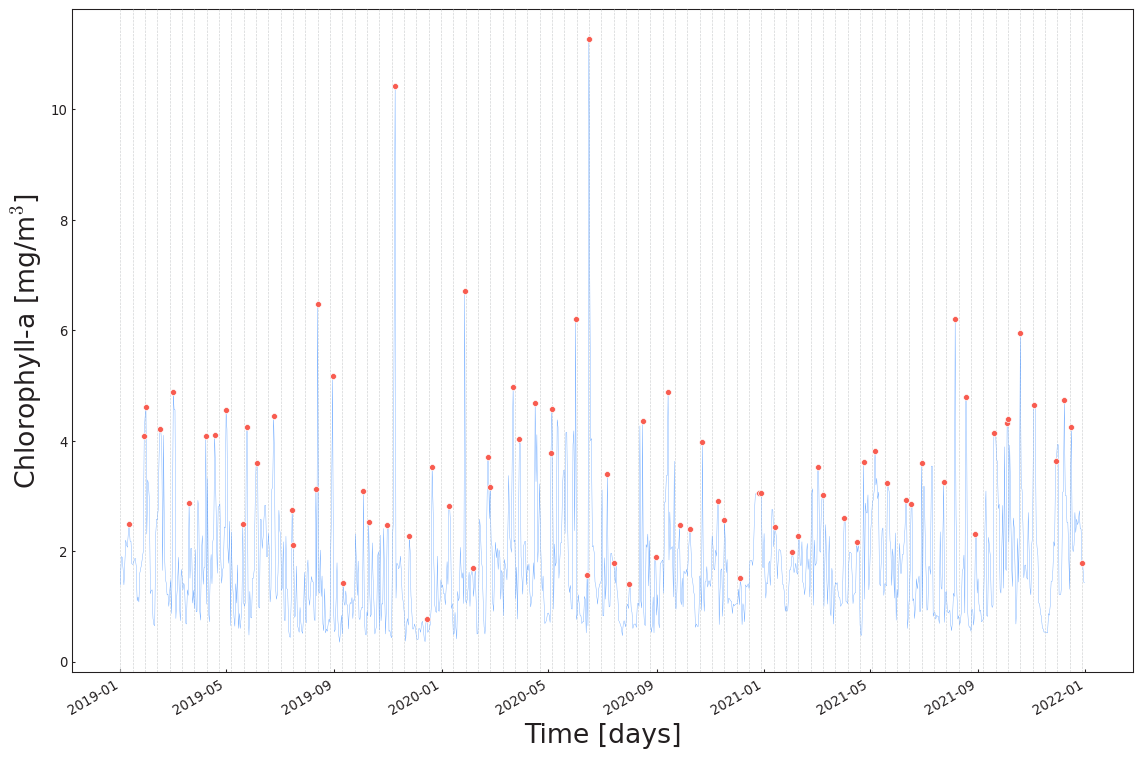

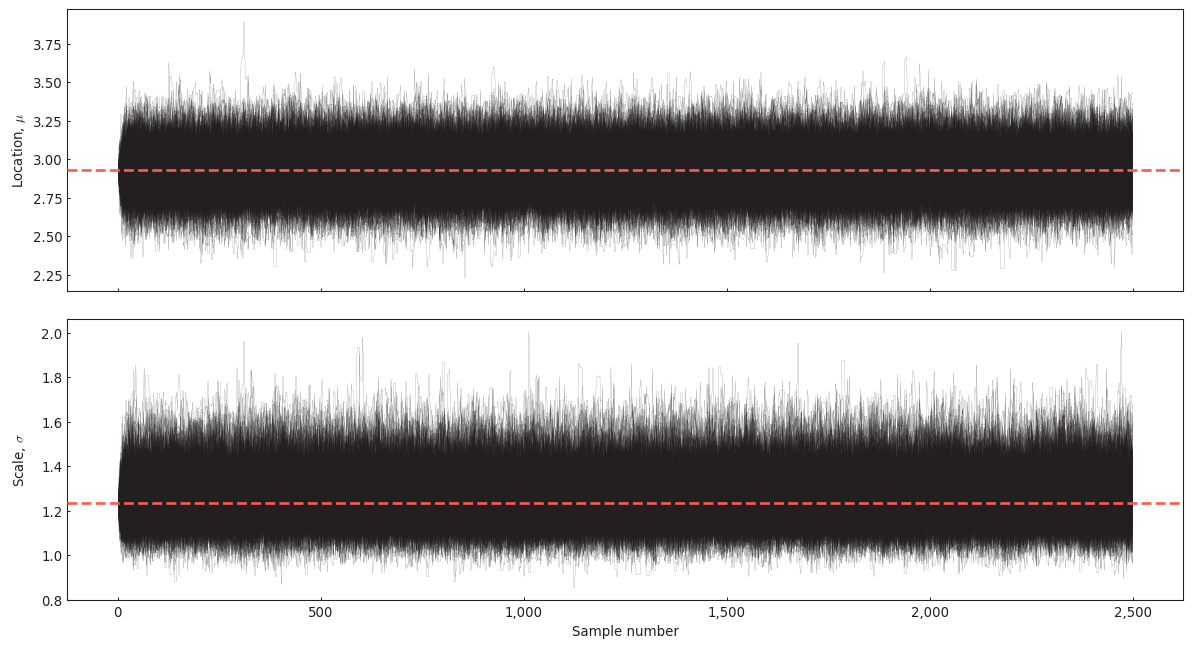

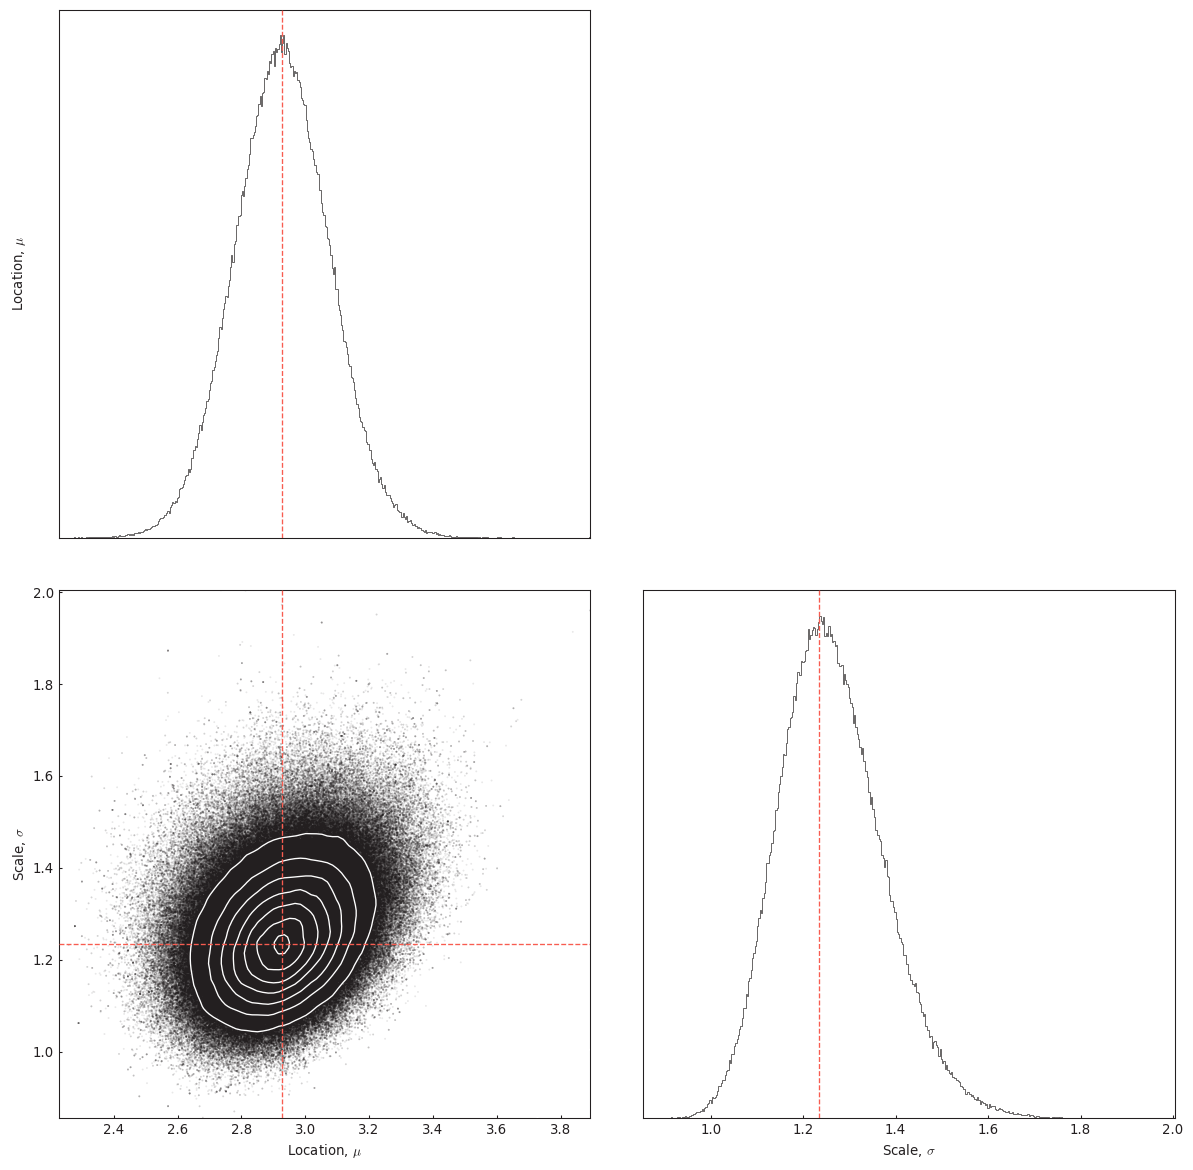

In [31]:
# Fit the model and plot the extremes and MCMC traces
ext_chl_model.fit_and_plot_model()

In [32]:
# Generate and save the summary of block maxima and return periods, and compute return periods for extremes
ext_chl_model.summarize_and_save()

Error summarizing and saving data: unrecognized arguments passed in: n_samples


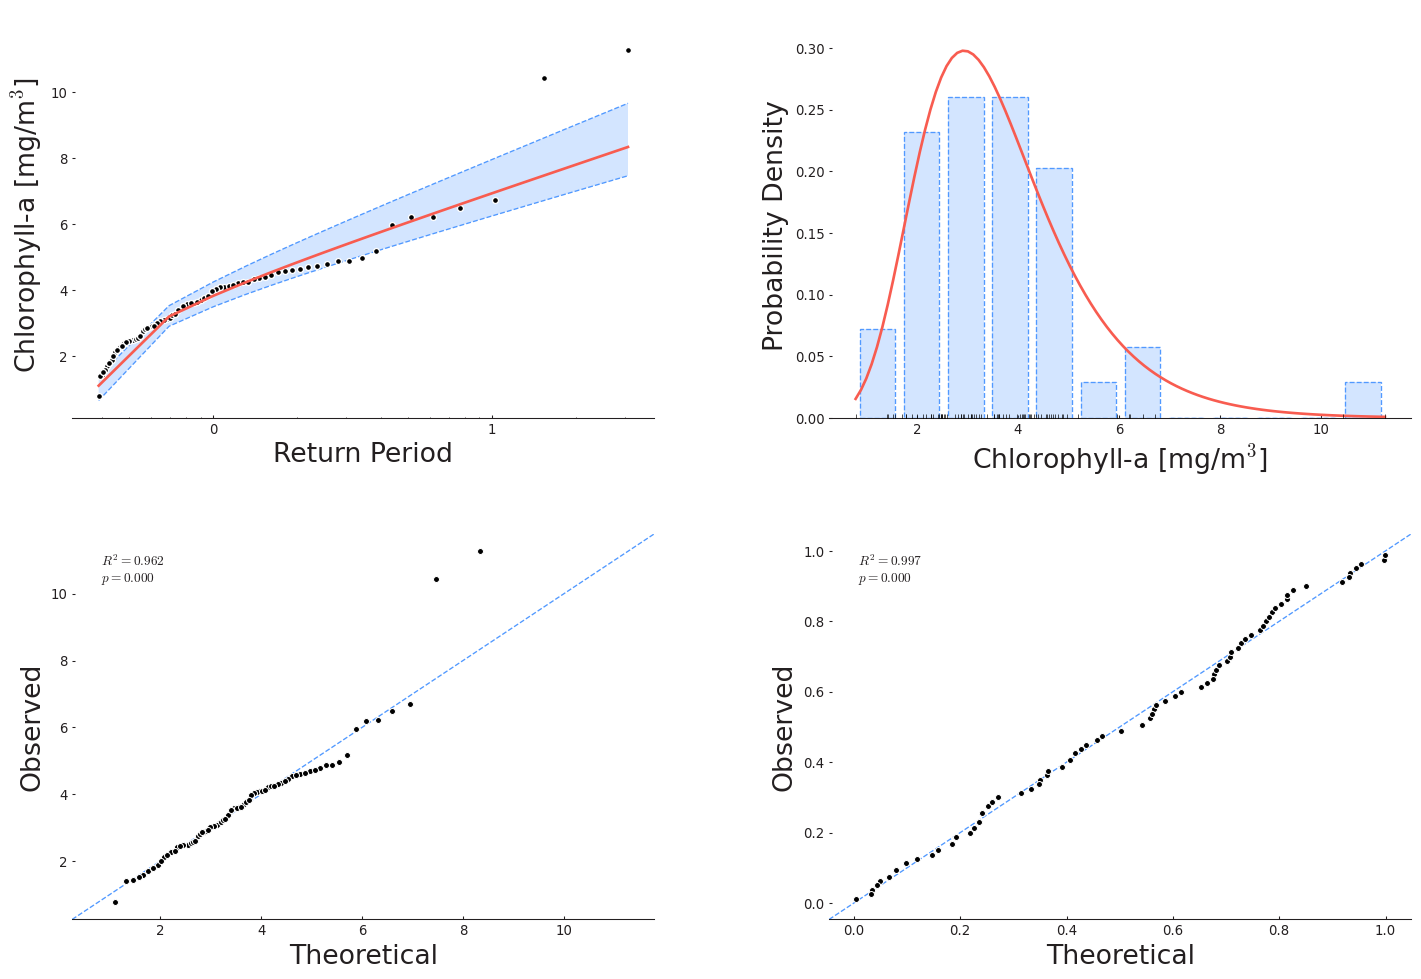

In [33]:
# Plot diagnostic figures for the extreme value analysis
ext_chl_model.plot_diagnostic_figures()

In [34]:
shutup.jk() # SPEAK !!!

# AutoGluon Machine Learning: Multivariate Regression

## Development

In [35]:
class AutoGluonWorkflow:
    """
    This class encapsulates the workflow for training and evaluating a machine learning model
    using AutoGluon's TabularPredictor for a given tabular dataset.
    """

    def __init__(self, data_path, save_path):
        """
        Initializes the workflow with the dataset path and the path to save trained models.

        Parameters:
        - data_path (str): The file path to the dataset.
        - save_path (str): The directory path to save the trained models and their artifacts.
        """
        self.data_path = data_path
        self.save_path = save_path
        self.predictor = None 

    def load_and_prepare_data(self):
        """
        Loads the dataset from the specified path and performs initial preprocessing, such as
        removing unnecessary columns.

        Returns:
        - A pandas DataFrame with the processed dataset or None if an error occurs.
        """
        try:
            data = TabularDataset(self.data_path)
            data.drop(columns='Date', inplace=True)  # Assuming 'Date' column is not needed
            return data
        except Exception as e:
            print(f"Failed to load or preprocess data: {e}")
            return None

    def split_data(self, data):
        """
        Splits the data into training and test sets.

        Parameters:
        - data (pd.DataFrame): The preprocessed dataset.

        Returns:
        - A tuple containing the training and test data as pandas DataFrames.
        """
        try:
            train_size = round(0.8 * len(data))
            train_data = data.sample(train_size, random_state=128)
            test_data = data.drop(train_data.index)
            return train_data, test_data
        except Exception as e:
            print(f"Failed to split data: {e}")
            return None, None

    def train_and_evaluate(self, train_data, test_data):
        """
        Trains a machine learning model using AutoGluon's TabularPredictor on the training data
        and evaluates its performance on the test set. It also calculates and prints feature
        importances.

        Parameters:
        - train_data (pd.DataFrame): The training dataset.
        - test_data (pd.DataFrame): The test dataset.
        """
        try:
            # Training the model
            self.predictor = TabularPredictor(label="Chlorophyll_a", path=self.save_path).fit(train_data)
            
            # Displaying the leaderboard of models
            leaderboard = self.predictor.leaderboard()
            leaderboard.to_csv("../data/devel_leaderboard.csv", index=False)
            print(leaderboard)

            # Evaluating the model on the test set
            y_test = test_data["Chlorophyll_a"]
            test_features = test_data.drop(columns=["Chlorophyll_a"])
            y_pred = self.predictor.predict(test_features)
            metrics = self.predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

            # Printing evaluation metrics with three decimal precision
            for key, value in metrics.items():
                print(f"{key}: {value:.3f}")

            # Calculating and printing feature importances
            feature_importance = self.predictor.feature_importance(test_data)
            feature_importance.to_csv("../data/devel_features_imp.csv", index=False)
            print(feature_importance)
        except Exception as e:
            print(f"Failed to train or evaluate the model: {e}")

    def get_predictor(self):
        """
        Returns the TabularPredictor instance used for training the model.

        Returns:
        - The TabularPredictor instance or None if the predictor is not yet initialized.
        """
        return self.predictor

if __name__ == "__main__":
    ag_workflow = AutoGluonWorkflow("../data/all_data.csv", "../autogluon_models/trained_models")
    data = ag_workflow.load_and_prepare_data()
    if data is not None:
        train_data, test_data = ag_workflow.split_data(data)
        if train_data is not None and test_data is not None:
            ag_workflow.train_and_evaluate(train_data, test_data)
            predictor = ag_workflow.get_predictor()

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "../autogluon_models/trained_models"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Fri Mar  1 16:53:59 UTC 2024
CPU Count:          8
Memory Avail:       27.40 GB / 31.08 GB (88.2%)
Disk Space Av

[1000]	valid_set's rmse: 1.04428


	-1.0358	 = Validation score   (-root_mean_squared_error)
	1.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-1.0949	 = Validation score   (-root_mean_squared_error)
	1.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1.1084	 = Validation score   (-root_mean_squared_error)
	1.15s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-1.0072	 = Validation score   (-root_mean_squared_error)
	2.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.0026	 = Validation score   (-root_mean_squared_error)
	1.0s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.1352	 = Validation score   (-root_mean_squared_error)
	8.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-1.2801	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.0s	 = Validation runtime
Fitti

                  model  score_val              eval_metric  pred_time_val  \
0   WeightedEnsemble_L2  -0.995083  root_mean_squared_error       0.145258   
1         ExtraTreesMSE  -1.002558  root_mean_squared_error       0.134122   
2              CatBoost  -1.007172  root_mean_squared_error       0.002257   
3            LightGBMXT  -1.035817  root_mean_squared_error       0.008373   
4         LightGBMLarge  -1.075390  root_mean_squared_error       0.002686   
5              LightGBM  -1.094944  root_mean_squared_error       0.005591   
6       RandomForestMSE  -1.108373  root_mean_squared_error       0.114846   
7       NeuralNetFastAI  -1.135232  root_mean_squared_error       0.014691   
8        NeuralNetTorch  -1.145887  root_mean_squared_error       0.061147   
9               XGBoost  -1.280130  root_mean_squared_error       0.004560   
10       KNeighborsUnif  -1.304055  root_mean_squared_error       0.023772   
11       KNeighborsDist  -1.328287  root_mean_squared_error     

Computing feature importance via permutation shuffling for 9 features using 219 rows with 5 shuffle sets...


root_mean_squared_error: -0.868
mean_squared_error: -0.754
mean_absolute_error: -0.646
r2: 0.204
pearsonr: 0.470
median_absolute_error: -0.515


	10.15s	= Expected runtime (2.03s per shuffle set)
	1.87s	= Actual runtime (Completed 5 of 5 shuffle sets)


                       importance    stddev   p_value  n  p99_high   p99_low
Temperature              0.071750  0.014505  0.000190  5  0.101615  0.041884
Solar_Radiation          0.061447  0.021620  0.001571  5  0.105962  0.016932
Phosphate                0.047210  0.011034  0.000333  5  0.069929  0.024491
Total_River_Discharge    0.042495  0.009901  0.000329  5  0.062881  0.022109
Salinity                 0.035294  0.008676  0.000405  5  0.053158  0.017430
Silicate                 0.032194  0.013379  0.002883  5  0.059741  0.004647
Dissolved_Oxygen         0.027826  0.005994  0.000243  5  0.040169  0.015484
Nitrate                  0.026418  0.008122  0.000949  5  0.043142  0.009694
Rainfall                -0.020214  0.007463  0.998124  5 -0.004847 -0.035581


## Deployment

In [36]:
# Load previously trained data
new_predictor = TabularPredictor.load("../autogluon_models/trained_models")

# Refit model to test data also for deployment
new_predictor.refit_full() 

# Save final model for deployment
new_predictor.clone_for_deployment('../autogluon_models/final_model_for_deployment')

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: KNeighborsUnif_FULL ...
	0.11s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: KNeighborsDist_FULL ...
	0.11s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBMXT_FULL ...
	1.35s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_FULL ...
	0.92s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: RandomForestMSE_FULL ...
	1.42s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: CatBoost_FULL ...
	1.46s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: ExtraT

FileExistsError: [Errno 17] File exists: '../autogluon_models/final_model_for_deployment'

# Acknowledgements

The author expresses profound gratitude to Iwan P. Anwar for his essential contribution in initiating this study and for the provision of his dissertation data for our analysis. Heartfelt thanks are also extended to Roby Douilly and fellow classmates from GEO256, whose teachings have been instrumental throughout the Spring quarter. Acknowledgment is also made to Andrew J. Ridgwell for his patience and understanding, which facilitated the delay of certain research activities to prioritize the completion of the final project. Additionally, the author is thankful for the financial support provided by the Directorate General of Higher Education, Research, and Technology, Ministry of Education, Culture, Research, and Technology, Republic of Indonesia, under grant No.FITB.PN-1-12-202, and ITB's Research, Community Service and Innovation Program (PPMI-ITB) for the years 2021 and 2022, which supported the data collection and numerical modeling efforts. The data processing and statistical analysis aspects of this study were made possible through the Dean's Distinguished Fellowship at the University of California, Riverside 2023.

# References

- Anwar, Iwan  Pramesti, et al. "Detecting chlorophyll-a concentration and bloom patterns in the coastal area around Indonesia's new capital city (Nusantara) using ocean color reanalysis data". AACL Bioflux 16. 4(2023): 2349 - 2367.
- Normile, Dennis. "Indonesia’s utopian new capital may not be as green as it looks." *Science* 375.6580 (2022): 479-480
- Putri, Mutiara Rachmat, et al. "Observation and numerical modeling of physical oceanography in the Balikpapan Bay, East Kalimantan: Preliminary results." *Depik* 10.2 (2021): 130-135.
